In [ ]:
"""
Created on 2021

@author: Administrator
"""

 =============================================================================
 =============================================================================
 문제 01 유형(DataSet_01.csv 이용)

 구분자 : comma(“,”), 4,572 Rows, 5 Columns, UTF-8 인코딩
 
 글로벌 전자제품 제조회사에서 효과적인 마케팅 방법을 찾기
 위해서 채널별 마케팅 예산과 매출금액과의 관계를 분석하고자
 한다.
 컬 럼 / 정 의  /   Type
 TV   /     TV 마케팅 예산 (억원)  /   Double
 Radio / 라디오 마케팅 예산 (억원)  /   Double
 Social_Media / 소셜미디어 마케팅 예산 (억원)  / Double
 Influencer / 인플루언서 마케팅
 (인플루언서의 영향력 크기에 따라 Mega / Macro / Micro / 
 Nano) / String
 
 SALES / 매출액 / Double
 
 =============================================================================




In [2]:
# 시험에서 사용되는 패키지
# pandas, numpy, scipy.stats, statsmodels, sklearn

import pandas as pd

data1 = pd.read_csv('Dataset_01.csv')
data1.info() #결측치 확인 할때


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social_Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [4]:
data1.columns

Index(['TV', 'Radio', 'Social_Media', 'Influencer', 'Sales'], dtype='object')

In [8]:

# =============================================================================
# 1. 데이터 세트 내에 총 결측값의 개수는 몇 개인가? (답안 예시) 23
# =============================================================================

# data1.isnull() 전체 true false를 보여줌
# 총 결측치의 수
# 이번 문제에서는 결측치가 행마다 한가지만 있기 때문에 결과가 같음

data1.isnull().sum() # true의 개수 열단위당 , 행단 위당 axis =1 시리즈 수

data1.isnull().sum().sum()
# 정답 단순



26

In [11]:
# (비교) : 결측치가 포항된 행의 수
data1.isna().any(axis = 1).sum()

26

 =============================================================================
 2. TV, Radio, Social Media 등 세 가지 다른 마케팅 채널의 예산과 매출액과의 상관분석을
 통하여 각 채널이 매출에 어느 정도 연관이 있는지 알아보고자 한다. 
 - 매출액과 가장 강한 상관관계를 가지고 있는 채널의 상관계수를 소수점 5번째
 자리에서 반올림하여 소수점 넷째 자리까지 기술하시오. (답안 예시) 0.1234
 
 
 #### 상관계수 : 두 변수 간의 선형 관계 정도 ( -1 ~ 1 )


In [12]:
data1.corr()

,TV,Radio,Social_Media,Sales
TV,1.000000,0.869460,0.528168,0.999497
Radio,0.869460,1.000000,0.607452,0.869105
Social_Media,0.528168,0.607452,1.000000,0.528906
Sales,0.999497,0.869105,0.528906,1.000000


In [13]:
#x_var = data1.columns.drop(['Influencer'])
x_var=['TV', 'Radio', 'Social_Media', 'Sales']
data1[x_var].corr()

,TV,Radio,Social_Media,Sales
TV,1.000000,0.869460,0.528168,0.999497
Radio,0.869460,1.000000,0.607452,0.869105
Social_Media,0.528168,0.607452,1.000000,0.528906
Sales,0.999497,0.869105,0.528906,1.000000


In [14]:
data1[x_var].corr().abs().drop('Sales')['Sales'] # Sales 행 제거후 Sales 만 추출

,TV,Radio,Social_Media,Sales
TV,1.000000,0.869460,0.528168,0.999497
Radio,0.869460,1.000000,0.607452,0.869105
Social_Media,0.528168,0.607452,1.000000,0.528906


In [16]:
# max, min // nlargest(), nsmallest()
q2 = data1[x_var].corr().abs().drop('Sales')['Sales']
q2.max() # 해당하는 정답
# q2.nlargest(1) # 최댇값 (상위 몇개)
# q2.argmax() # 최대값이 있는 위치번호
# q2.idxmax() # 최대값이 있는 인덱스 명

0.999497444941335

In [18]:
q2.argmax()

0

In [19]:
q2.idxmax()

'TV'

In [20]:
import numpy as np

np.round(123.47, 1) # 반올림

123.5

In [26]:
np.floor(123.47) # 내림 ( 정수 형 )

123.0

In [27]:
#floor 소숫점 첫째 자리에서 내림 하는 방법
np.floor(123.47*10)/10

123.4

In [28]:
np.ceil(123.47) # 올림

124.0

In [29]:
np.trunc(123.47) # 절삭 : 뒷자리는 무조건 잘라라 양수 음수 모두 잘라 뒤에는

123.0

In [30]:
round(q2.max(), 4) # 정답처리 방법

0.9995

  =============================================================================
 3. 매출액을 종속변수, TV, Radio, Social Media의 예산을 독립변수로 하여 회귀분석을
 수행하였을 때, 세 개의 독립변수의 회귀계수를 큰 것에서부터 작은 것 순으로
 기술하시오. 
 - 분석 시 결측치가 포함된 행은 제거한 후 진행하며, 회귀계수는 소수점 넷째 자리
 이하는 버리고 소수점 셋째 자리까지 기술하시오. (답안 예시) 0.123









In [31]:
# 결측치 제거
q3 = data1.dropna()
x_var = ['TV', 'Radio', 'Social_Media',]



,TV,Radio,Social_Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [36]:
# 회귀 분석
from sklearn.linear_model import LinearRegression # 데이터 기반
from statsmodels.formula.api import ols # 모수적 방법으로 의사 결정 하는 방식, 가설 검정
from statsmodels.api import add_constant, OLS # 상수항 미포함

lm = LinearRegression(fit_intercept = True) # 상수항 포함하겠다 # default 상수항 포함
lm.fit(q3[x_var], q3.Sales)

LinearRegression()

In [ ]:
dir(lm) # 사용가능한 atrribute, method 확인가능

In [38]:
lm.intercept_ # 상수

-0.13396305194245883

In [39]:
lm.coef_ # 회귀계수 # 상수항 포함 여부 반드시 확인 값이 달라짐

array([ 3.56256963, -0.00397039,  0.00496402])

In [42]:
# 변수항 포함
lm_out = pd.DataFrame(lm.coef_)
lm_out.index = x_var # colums 열, 행은 index
lm_out

,0
TV,3.562570
Radio,-0.003970
Social_Media,0.004964


In [48]:
lm_out.sort_values(by = 0, ascending = False) 
# sort_index는 이름을 기준으로 정렬
# by = 열이름
# ascending = False ( 내림 차순 )

,0
TV,3.562570
Social_Media,0.004964
Radio,-0.003970


In [50]:
lm_ans = lm_out.sort_values(by = 0, ascending = False) 
np.trunc(lm_ans*1000)/1000 # 버리라고 했기 때문에 trunc

,0
TV,3.562
Social_Media,0.004
Radio,-0.003


In [53]:
#ols(식, 데이터셋).fit()
#'y ~ x1+x2+c(x3)' c(x3) : 범주형 변수
# 상수항 제거 기법
# form = "Sales~-1+" + '+'.join(x_var)

form = 'Sales~' + '+'.join(x_var) # join 사용하기
form

'Sales~TV+Radio+Social_Media'

In [54]:
ols1 = ols(form, q3).fit() # 결측지 제거한 q3 

In [55]:
dir(ols1)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'info_criteria',


In [56]:
ols1.params

Intercept      -0.133963
TV              3.562570
Radio          -0.003970
Social_Media    0.004964
dtype: float64

In [57]:
ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.505e+06
Date:                Sat, 09 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:42:45   Log-Likelihood:                -11366.
No. Observations:                4546   AIC:                         2.274e+04
Df Residuals:                    4542   BIC:                         2.277e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1340      0.103     -1.303      0.193      -0.336       0.068
TV               3.5626      0.003   1051.118      0.000       3.556       3.569
Radio           -0.0040      0.010     -0.406      0.685      -0.023       0.015
Social_Media     0.0050      0.025      0.199      0.842      -0.044       0.054
==============================================================================
Omnibus:                        0.056   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.972   Jarque-Bera (JB):                0.034
Skew:                          -0.001   Prob(JB):                        0.983
Kurtosis:                       3.013   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
ols1.f_pvalue < 0.05

True

In [59]:
(ols1.pvalues < 0.05).index

Index(['Intercept', 'TV', 'Radio', 'Social_Media'], dtype='object')

In [60]:
 ols1.pvalues.index[ols1.pvalues < 0.05] # 뽑기


Index(['TV'], dtype='object')

In [64]:
x_var1 =  ols1.pvalues.index[ols1.pvalues < 0.05] # 뽑기

# c. OLS
# OLS(Y, X).fit()
xx = add_constant(q3[x_var1])
ols2 = OLS(q3['Sales'], q3[x_var1]).fit()
ols3 = OLS(q3['Sales'], xx).fit()



In [65]:
ols2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.386e+07
Date:                Sat, 09 Oct 2021   Prob (F-statistic):                        0.00
Time:                        15:45:20   Log-Likelihood:                         -11367.
No. Observations:                4546   AIC:                                  2.274e+04
Df Residuals:                    4545   BIC:                                  2.274e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             3.5595      0.001   4884.964      0.000       3.558       3.561
==============================================================================
Omnibus:                        0.055   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.973   Jarque-Bera (JB):                0.033
Skew:                          -0.001   Prob(JB):                        0.984
Kurtosis:                       3.013   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
ols3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.517e+06
Date:                Sat, 09 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:45:37   Log-Likelihood:                -11366.
No. Observations:                4546   AIC:                         2.274e+04
Df Residuals:                    4544   BIC:                         2.275e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1325      0.101     -1.317      0.188      -0.330       0.065
TV             3.5615      0.002   2125.272      0.000       3.558       3.565
==============================================================================
Omnibus:                        0.052   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.974   Jarque-Bera (JB):                0.031
Skew:                          -0.001   Prob(JB):                        0.985
Kurtosis:                       3.012   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


 =============================================================================
 문제 02 유형(DataSet_02.csv 이용)
 구분자 : comma(“,”), 200 Rows, 6 Columns, UTF-8 인코딩

 환자의 상태와 그에 따라 처방된 약에 대한 정보를 분석하고자한다
 
 컬 럼 / 정 의  / Type
 Age  / 연령 / Integer
 Sex / 성별 / String
 BP / 혈압 레벨 / String
 Cholesterol / 콜레스테롤 레벨 /  String
 Na_to_k / 혈액 내 칼륨에 대비한 나트륨 비율 / Double
 Drug / Drug Type / String


In [67]:
import pandas as pd

data2 = pd.read_csv('Dataset_02.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


#=============================================================================
 1.해당 데이터에 대한 EDA를 수행하고, 여성으로 혈압이 High, Cholesterol이 Normal인
 환자의 전체에 대비한 비율이 얼마인지 소수점 네 번째 자리에서 반올림하여 소수점 셋째
 자리까지 기술하시오. (답안 예시) 0.123
 






In [69]:
data2.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [70]:
data2[['Sex','BP', 'Cholesterol']].value_counts()

Sex  BP      Cholesterol
F    HIGH    NORMAL         21
M    HIGH    NORMAL         21
     LOW     NORMAL         19
     NORMAL  HIGH           19
F    NORMAL  HIGH           18
M    HIGH    HIGH           18
F    HIGH    HIGH           17
M    LOW     HIGH           17
F    LOW     HIGH           14
             NORMAL         14
     NORMAL  NORMAL         12
M    NORMAL  NORMAL         10
dtype: int64

In [73]:
q1 = data2[['Sex','BP', 'Cholesterol']].value_counts(normalize = True)

In [74]:
q1.index

MultiIndex([('F',   'HIGH', 'NORMAL'),
            ('M',   'HIGH', 'NORMAL'),
            ('M',    'LOW', 'NORMAL'),
            ('M', 'NORMAL',   'HIGH'),
            ('F', 'NORMAL',   'HIGH'),
            ('M',   'HIGH',   'HIGH'),
            ('F',   'HIGH',   'HIGH'),
            ('M',    'LOW',   'HIGH'),
            ('F',    'LOW',   'HIGH'),
            ('F',    'LOW', 'NORMAL'),
            ('F', 'NORMAL', 'NORMAL'),
            ('M', 'NORMAL', 'NORMAL')],
           names=['Sex', 'BP', 'Cholesterol'])

In [75]:
q1[('F',   'HIGH', 'NORMAL')] # 정답

0.105

In [76]:
# 방법 2 구 버전에서 사용하는 방법

q1_cross = pd.crosstab(index = [data2['Sex'],data2['BP']], columns = data2['Cholesterol'],
                      normalize = True)

q1_cross.loc[('F',   'HIGH'), 'NORMAL']

0.105

 =============================================================================
2. Age, Sex, BP, Cholesterol 및 Na_to_k 값이 Drug 타입에 영향을 미치는지 확인하기
위하여 아래와 같이 데이터를 변환하고 분석을 수행하시오. 
- Age_gr 컬럼을 만들고, Age가 20 미만은 ‘10’, 20부터 30 미만은 ‘20’, 30부터 40 미만은
‘30’, 40부터 50 미만은 ‘40’, 50부터 60 미만은 ‘50’, 60이상은 ‘60’으로 변환하시오. 
- Na_K_gr 컬럼을 만들고 Na_to_k 값이 10이하는 ‘Lv1’, 20이하는 ‘Lv2’, 30이하는 ‘Lv3’, 30 
초과는 ‘Lv4’로 변환하시오.
- Sex, BP, Cholesterol, Age_gr, Na_K_gr이 Drug 변수와 영향이 있는지 독립성 검정을
수행하시오.
- 검정 수행 결과, Drug 타입과 연관성이 있는 변수는 몇 개인가? 연관성이 있는 변수
가운데 가장 큰 p-value를 찾아 소수점 여섯 번째 자리 이하는 버리고 소수점 다섯
번째 자리까지 기술하시오.
(답안 예시) 3, 1.23456

===============================================================================








In [102]:
# 변수 변환 : Age_gr, Na_K_gr
import numpy as np
q2 = data2.copy()

# 일정한 구간으로 끊을 것이라면 cut, 지속 적이라면 끊으려면 np.where
# ifelse
# np.where(조건) : 조건에 해당하는 위치값을 리턴
# np.where(조건, 창인경우 실행문, 거짓인 경우 실행문)
q2['Age_gr'] = np.where(q2['Age'] < 20 , 10, 
                        np.where(q2['Age']<30 , 20, 
                                np.where(q2['Age'] < 40, 30,
                                        np.where(q2['Age'] < 50, 40,
                                                np.where(q2['Age']< 60, 50 , 60)))))

q2['Na_K_gr'] = np.where(q2['Na_to_K'] <= 10, 'Lv1',
                        np.where(q2['Na_to_K'] <= 20, 'Lv2',
                                np.where(q2['Na_to_K'] <= 30, 'Lv3', 'Lv4' )))

# 빈도 - 카이제곱 검정을 하기 위함
q2.columns
# [ 'Sex', 'BP', 'Cholesterol', 'Drug', 'Age_gr','Na_K_gr']

temp = pd.crosstab(index = q2['Sex'], columns = q2['Drug'])
temp

# 빈도를 입력으로 카이제곱 검정 진행
from scipy.stats import chi2_contingency

chi2_contingency(temp)
# (2.119248418109203, chi2 통계량
#  0.7138369773987128, pvalue
#  4, # 자유도
#  array([[43.68, 11.04,  7.68,  7.68, 25.92],
#         [47.32, 11.96,  8.32,  8.32, 28.08]]))


     Age Sex      BP Cholesterol  Na_to_K   Drug  Age_gr Na_K_gr
0     23   F    HIGH        HIGH   25.355  DrugY      20     Lv3
1     47   M     LOW        HIGH   13.093  drugC      40     Lv2
2     47   M     LOW        HIGH   10.114  drugC      40     Lv2
3     28   F  NORMAL        HIGH    7.798  drugX      20     Lv1
4     61   F     LOW        HIGH   18.043  DrugY      60     Lv2
..   ...  ..     ...         ...      ...    ...     ...     ...
195   56   F     LOW        HIGH   11.567  drugC      50     Lv2
196   16   M     LOW        HIGH   12.006  drugC      10     Lv2
197   52   M  NORMAL        HIGH    9.894  drugX      50     Lv1
198   23   M  NORMAL      NORMAL   14.020  drugX      20     Lv2
199   40   F     LOW      NORMAL   11.349  drugX      40     Lv2

[200 rows x 8 columns]


In [108]:
# 변수 별로 쌍으로 진행( 반복 기능 포함 )
var_list = [ 'Sex', 'BP', 'Cholesterol',  'Age_gr','Na_K_gr']

q2_out = []

for i in var_list:
    temp = pd.crosstab(index = q2[i], columns = q2['Drug'])
#     print(temp, i)
    pvalue = chi2_contingency(temp)[1]
    q2_out.append([i, pvalue])
    
# 연관성이 있다 ( 귀무 가설 기각 되는 변수 목록 ( 통계량인지 이름인지) )
q2_out
q2_out = pd.DataFrame(q2_out, columns =['var', 'pvalue'])

q2_ans = q2_out[q2_out.pvalue < 0.05]['pvalue'].max()

np.trunc(q2_ans*100000)/100000

0.0007

=============================================================================
3.Sex, BP, Cholesterol 등 세 개의 변수를 다음과 같이 변환하고 의사결정나무를 이용한
분석을 수행하시오.
- Sex는 M을 0, F를 1로 변환하여 Sex_cd 변수 생성
- BP는 LOW는 0, NORMAL은 1 그리고 HIGH는 2로 변환하여 BP_cd 변수 생성
- Cholesterol은 NORMAL은 0, HIGH는 1로 변환하여 Ch_cd 생성
- Age, Na_to_k, Sex_cd, BP_cd, Ch_cd를 Feature로, Drug을 Label로 하여 의사결정나무를
수행하고 Root Node의 split feature와 split value를 기술하시오. 
이 때 split value는 소수점 셋째 자리까지 반올림하여 기술하시오. (답안 예시) Age, 
12.345















In [110]:
# 결측치 없어야 딤, 입력 변수는 수치형 변수로 구성

# 변수 변환

q3 = data2.copy()
# q3['Sex'].value_counts() 를 통해 label 결측치 확인해야함
q3["Sex_cd"] = np.where(q3['Sex'] == 'M', 0 , 1)
q3['BP_cd'] = np.where(q3['BP'] == 'LOW' , 0 , 
                     np.where(q3['BP'] == 'NORMAL' , 1 , 2))
q3['Ch_cd'] = np.where(q3['Cholesterol'] == 'NORMAL', 0, 1)

In [118]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

x_var = ['Age','Na_to_K','Sex_cd', 'BP_cd','Ch_cd']
dt = DecisionTreeClassifier().fit(q3[x_var], q3.Drug)

'|--- Na_to_K <= 14.83\n|   |--- BP_cd <= 1.50\n|   |   |--- BP_cd <= 0.50\n|   |   |   |--- Ch_cd <= 0.50\n|   |   |   |   |--- class: drugX\n|   |   |   |--- Ch_cd >  0.50\n|   |   |   |   |--- class: drugC\n|   |   |--- BP_cd >  0.50\n|   |   |   |--- class: drugX\n|   |--- BP_cd >  1.50\n|   |   |--- Age <= 50.50\n|   |   |   |--- class: drugA\n|   |   |--- Age >  50.50\n|   |   |   |--- class: drugB\n|--- Na_to_K >  14.83\n|   |--- class: DrugY\n'

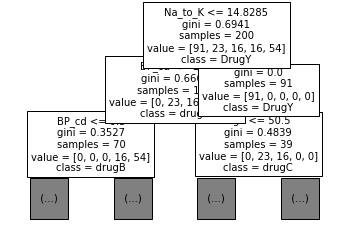

In [120]:
ylab = list(q3.Drug.unique())

plot_tree(dt, max_depth = 2,
         feature_names = x_var,
         class_names = ylab,
         precision = 4,
         fontsize = 10)

export_text(dt, feature_names = x_var)


=============================================================================
 문제 03 유형(DataSet_03.csv 이용)

구분자 : comma(“,”), 5,001 Rows, 8 Columns, UTF-8 인코딩
안경 체인을 운영하고 있는 한 회사에서 고객 사진을 바탕으로 안경의 사이즈를
맞춤 제작하는 비즈니스를 기획하고 있다. 우선 데이터만으로 고객의 성별을
파악하는 것이 가능할 지를 연구하고자 한다.

컬 럼 / 정 의 / Type
long_hair / 머리카락 길이 (0 – 길지 않은 경우 / 1 – 긴
경우) / Integer
forehead_width_cm / 이마의 폭 (cm) / Double
forehead_height_cm / 이마의 높이 (cm) / Double
nose_wide / 코의 넓이 (0 – 넓지 않은 경우 / 1 – 넓은 경우) / Integer
nose_long / 코의 길이 (0 – 길지 않은 경우 / 1 – 긴 경우) / Integer
lips_thin / 입술이 얇은지 여부 0 – 얇지 않은 경우 / 1 –
얇은 경우) / Integer
distance_nose_to_lip_long / 인중의 길이(0 – 인중이 짧은 경우 / 1 – 인중이
긴 경우) / Integer
gender / 성별 (Female / Male) / String


 =============================================================================
1.이마의 폭(forehead_width_cm)과 높이(forehead_height_cm) 사이의
비율(forehead_ratio)에 대해서 평균으로부터 3 표준편차 밖의 경우를 이상치로
정의할 때, 이상치에 해당하는 데이터는 몇 개인가? (답안 예시) 10











#=============================================================================
2.성별에 따라 forehead_ratio 평균에 차이가 있는지 적절한 통계 검정을 수행하시오.
- 검정은 이분산을 가정하고 수행한다.
- 검정통계량의 추정치는 절대값을 취한 후 소수점 셋째 자리까지 반올림하여
기술하시오.
- 신뢰수준 99%에서 양측 검정을 수행하고 결과는 귀무가설 기각의 경우 Y로, 그렇지
않을 경우 N으로 답하시오. (답안 예시) 1.234, Y









=============================================================================
3.주어진 데이터를 사용하여 성별을 구분할 수 있는지 로지스틱 회귀분석을 적용하여
알아 보고자 한다. 
- 데이터를 7대 3으로 나누어 각각 Train과 Test set로 사용한다. 이 때 seed는 123으로
한다.
- 원 데이터에 있는 7개의 변수만 Feature로 사용하고 gender를 label로 사용한다.
(forehead_ratio는 사용하지 않음)
- 로지스틱 회귀분석 예측 함수와 Test dataset를 사용하여 예측을 수행하고 정확도를
평가한다. 이 때 임계값은 0.5를 사용한다. 
- Male의 Precision 값을 소수점 둘째 자리까지 반올림하여 기술하시오. (답안 예시) 
0.12


(참고) 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
train_test_split 의 random_state = 123















=============================================================================
문제 04 유형(DataSet_04.csv 이용)

구분자 : comma(“,”), 6,718 Rows, 4 Columns, UTF-8 인코딩

한국인의 식생활 변화가 건강에 미치는 영향을 분석하기에 앞서 육류
소비량에 대한 분석을 하려고 한다. 확보한 데이터는 세계 각국의 1인당
육류 소비량 데이터로 아래와 같은 내용을 담고 있다.

컬 럼 / 정 의 / Type
LOCATION / 국가명 / String
SUBJECT / 육류 종류 (BEEF / PIG / POULTRY / SHEEP) / String
TIME / 연도 (1990 ~ 2026) / Integer
Value / 1인당 육류 소비량 (KG) / Double

=============================================================================
(참고)

import pandas as pd
import numpy as np

from scipy.stats import ttest_rel

from sklearn.linear_model import LinearRegression

=============================================================================
1.한국인의 1인당 육류 소비량이 해가 갈수록 증가하는 것으로 보여 상관분석을 통하여
확인하려고 한다. 
- 데이터 파일로부터 한국 데이터만 추출한다. 한국은 KOR로 표기되어 있다.
- 년도별 육류 소비량 합계를 구하여 TIME과 Value간의 상관분석을 수행하고
상관계수를 소수점 셋째 자리에서 반올림하여 소수점 둘째 자리까지만 기술하시오. 
(답안 예시) 0.55

=============================================================================







 =============================================================================
2. 한국 인근 국가 가운데 식생의 유사성이 상대적으로 높은 일본(JPN)과 비교하여, 연도별
소비량에 평균 차이가 있는지 분석하고자 한다.
- 두 국가의 육류별 소비량을 연도기준으로 비교하는 대응표본 t 검정을 수행하시오.
- 두 국가 간의 연도별 소비량 차이가 없는 것으로 판단할 수 있는 육류 종류를 모두
적으시오. (알파벳 순서) (답안 예시) BEEF, PIG, POULTRY, SHEEP

=============================================================================






=============================================================================
3.(한국만 포함한 데이터에서) Time을 독립변수로, Value를 종속변수로 하여 육류
종류(SUBJECT) 별로 회귀분석을 수행하였을 때, 가장 높은 결정계수를 가진 모델의
학습오차 중 MAPE를 반올림하여 소수점 둘째 자리까지 기술하시오. (답안 예시) 21.12
(MAPE : Mean Absolute Percentage Error, 평균 절대 백분율 오차)
(MAPE = Σ ( | y - y ̂ | / y ) * 100/n ))

=============================================================================













=============================================================================
#문제 05 유형(DataSet_05.csv 이용)

구분자 : comma(“,”), 8,068 Rows, 12 Columns, UTF-8 인코딩

A자동차 회사는 신규 진입하는 시장에 기존 모델을 판매하기 위한 마케팅 전략을 
세우려고 한다. 기존 시장과 고객 특성이 유사하다는 전제 하에 기존 고객을 세분화하여
각 그룹의 특징을 파악하고, 이를 이용하여 신규 진입 시장의 마케팅 계획을 
수립하고자 한다. 다음은 기존 시장 고객에 대한 데이터이다.


컬 럼 / 정 의 / Type
ID / 고유 식별자 / Double
Age / 나이 / Double
Age_gr / 나이 그룹 (10/20/30/40/50/60/70) / Double
Gender / 성별 (여성 : 0 / 남성 : 1) / Double
Work_Experience / 취업 연수 (0 ~ 14) / Double
Family_Size / 가족 규모 (1 ~ 9) / Double
Ever_Married / 결혼 여부 (Unknown : 0 / No : 1 / Yes : 2) / Double
Graduated / 재학 중인지 여부 / Double
Profession / 직업 (Unknown : 0 / Artist ~ Marketing 등 9개) / Double
Spending_Score / 소비 점수 (Average : 0 / High : 1 / Low : 2) / Double
Var_1 / 내용이 알려지지 않은 고객 분류 코드 (0 ~ 7) / Double
Segmentation / 고객 세분화 결과 (A ~ D) / String

=============================================================================


(참고)

import pandas as pd

from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydot

=============================================================================
1.위의 표에 표시된 데이터 타입에 맞도록 전처리를 수행하였을 때, 데이터 파일 내에
존재하는 결측값은 모두 몇 개인가? 숫자형 데이터와 문자열 데이터의 결측값을
모두 더하여 답하시오.
(String 타입 변수의 경우 White Space(Blank)를 결측으로 처리한다) (답안 예시) 123

=============================================================================






=============================================================================
2.이어지는 분석을 위해 결측값을 모두 삭제한다. 그리고, 성별이 세분화(Segmentation)에
영향을 미치는지 독립성 검정을 수행한다. 수행 결과, p-value를 반올림하여 소수점
넷째 자리까지 쓰고, 귀무가설을 기각하면 Y로, 기각할 수 없으면 N으로 기술하시오. 
(답안 예시) 0.2345, N

=============================================================================





=============================================================================
3.Segmentation 값이 A 또는 D인 데이터만 사용하여 의사결정 나무 기법으로 분류
정확도를
측정해 본다. 
- 결측치가 포함된 행은 제거한 후 진행하시오.
- Train대 Test 7대3으로 데이터를 분리한다. (Seed = 123)
- Train 데이터를 사용하여 의사결정나무 학습을 수행하고, Test 데이터로 평가를
수행한다.
- 의사결정나무 학습 시, 다음과 같이 설정하시오:
• Feature: Age_gr, Gender, Work_Experience, Family_Size, 
            Ever_Married, Graduated, Spending_Score
• Label : Segmentation
• Parameter : Gini / Max Depth = 7 / Seed = 123
이 때 전체 정확도(Accuracy)를 소수점 셋째 자리 이하는 버리고 소수점 둘째자리까지
기술하시오.
(답안 예시) 0.12

=============================================================================

